In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
df = pd.read_csv("Sales_Data_Final.csv")

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Add month column for monthly trends
df['month'] = df['date'].dt.to_period('M')


In [ ]:
total_revenue = df['total_amount'].sum()
print(f"💰 Total Revenue: ₹{total_revenue:,.2f}")

💰 Total Revenue: ₹1,818,866.29


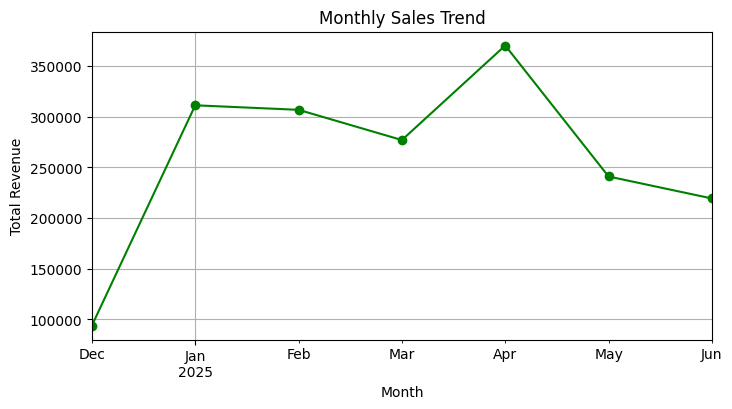

In [ ]:
monthly_sales = df.groupby('month')['total_amount'].sum()

# Plot
monthly_sales.plot(kind='line', marker='o', color='green', figsize=(8,4))
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()


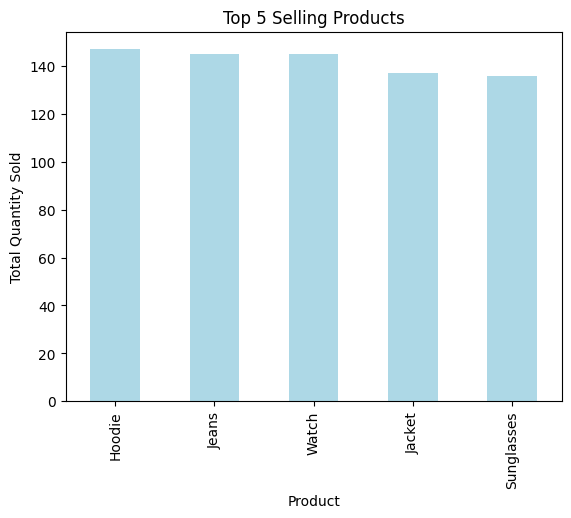

In [ ]:
top_products = df.groupby('product')['quantity'].sum().sort_values(ascending=False).head(5)

# Plot
top_products.plot(kind='bar', color='lightblue')
plt.title("Top 5 Selling Products")
plt.xlabel("Product")
plt.ylabel("Total Quantity Sold")
plt.show()


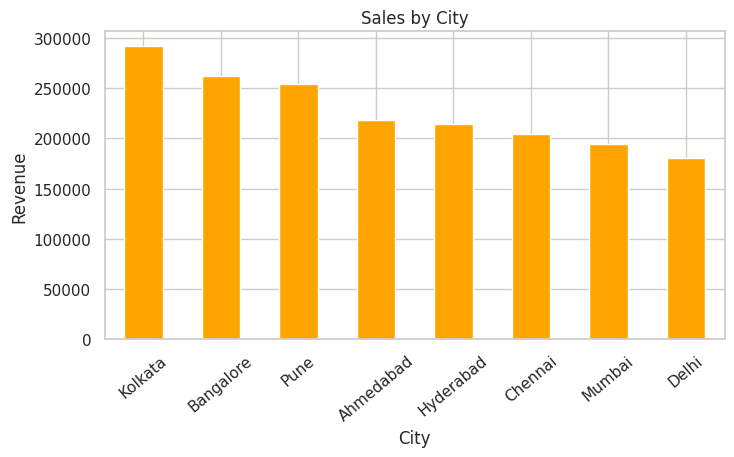

In [ ]:
city_sales = df.groupby('city')['total_amount'].sum().sort_values(ascending=False)

# Plot
city_sales.plot(kind='bar', color='orange', figsize=(8,4))
plt.title("Sales by City")
plt.xlabel("City")
plt.ylabel("Revenue")
plt.xticks(rotation=40)
plt.show()


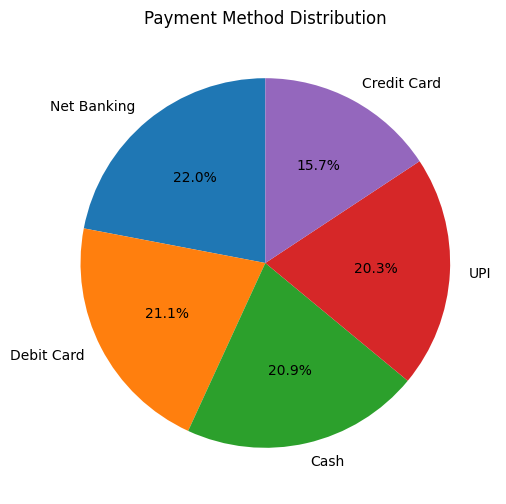

In [ ]:
payment_sales = df['payment_method'].value_counts()

# Plot
payment_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6,6))
plt.title("Payment Method Distribution")
plt.ylabel("")  # hide label
plt.show()


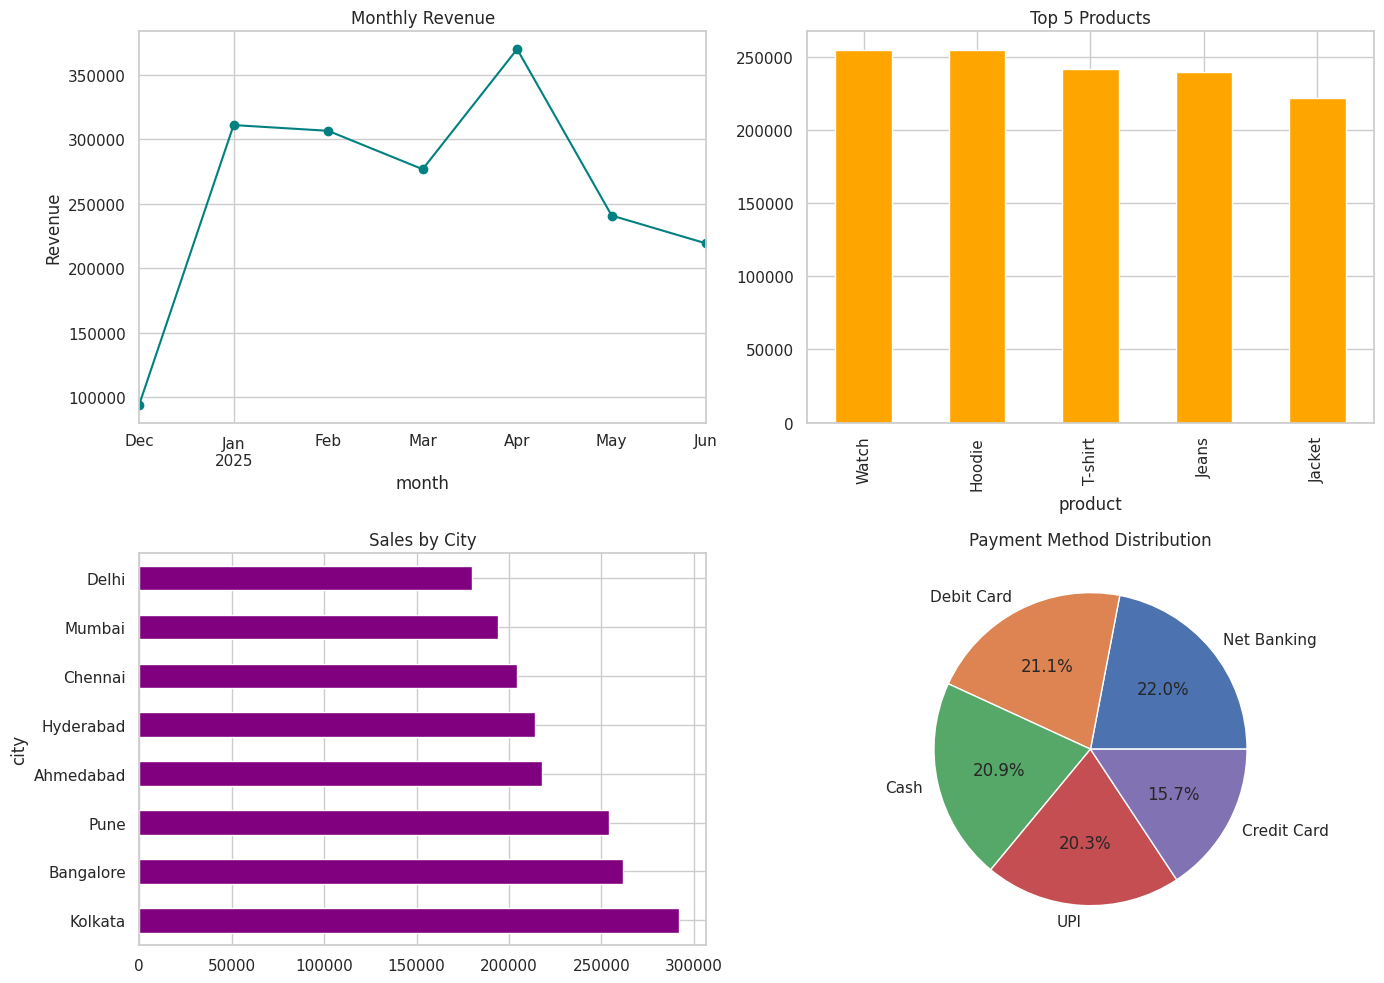

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Total revenue by month
df['month'] = df['date'].dt.to_period('M')
monthly_revenue = df.groupby('month')['total_amount'].sum()

# Top products
top_products = df.groupby('product')['total_amount'].sum().sort_values(ascending=False).head(5)

# Sales by city
city_sales = df.groupby('city')['total_amount'].sum().sort_values(ascending=False)

# Payment method distribution
payment_counts = df['payment_method'].value_counts()

# Create dashboard layout
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Chart 1: Monthly Revenue
monthly_revenue.plot(kind='line', marker='o', ax=axes[0, 0], color='teal')
axes[0, 0].set_title('Monthly Revenue')
axes[0, 0].set_ylabel('Revenue')

# Chart 2: Top Products
top_products.plot(kind='bar', ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Top 5 Products')

# Chart 3: City-wise Sales
city_sales.plot(kind='barh', ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Sales by City')

# Chart 4: Payment Method
payment_counts.plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%')
axes[1, 1].set_title('Payment Method Distribution')
axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()
